# Yolo inference with heat map generation
## Imports

In [1]:
import os
import cv2
import random
import numpy as np
from datetime import datetime
from CellDetector import CellDetector
import matplotlib.pyplot as plt
%matplotlib inline

## Load model

In [2]:
cell_detector = CellDetector("02_23_all_data_ft.pt")

## Load data

In [3]:
DEATH_TYPE = "Apoptosis"
CELL_TYPE = "HT29"
base_dir = "../new_data/" + DEATH_TYPE + "/"
images_dir = base_dir + CELL_TYPE + "_phase/"
green_dir = base_dir + CELL_TYPE + "_Green/"
images = os.listdir(images_dir)
len_images = len(images)

In [4]:
image_id = random.randrange(len_images)
print(image_id)
source = images_dir + images[image_id]
source_green = green_dir + images[image_id]
print(source)

img = cv2.imread(source, cv2.IMREAD_UNCHANGED)

img_green = cv2.imread(source_green, cv2.IMREAD_UNCHANGED)
img_green = cv2.convertScaleAbs(img_green, alpha=(255.0/65535.0))
img_green = cv2.addWeighted(img_green, 8.7, np.zeros(img_green.shape, img_green.dtype), 0, 0.0)

139
../new_data/Apoptosis/HT29_phase/VID849_A3_4_00d12h00m.png


## Predict

In [5]:
apoptosis_image, necroptosis_image, background_image, big_image, results = cell_detector.predict_with_heatmap(img, 0.2, 0.4, desired_coverage = 10, withImage = True, withResults = True)

Random Croping
Total random crops to execute: 1316

0: 128x128 (no detections), 49.8ms
Speed: 0.3ms preprocess, 49.8ms inference, 0.2ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 1 apoptosis, 45.9ms
Speed: 0.5ms preprocess, 45.9ms inference, 0.4ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 46.4ms
Speed: 0.5ms preprocess, 46.4ms inference, 0.2ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 2 apoptosiss, 44.6ms
Speed: 0.6ms preprocess, 44.6ms inference, 0.3ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 1 apoptosis, 44.2ms
Speed: 0.4ms preprocess, 44.2ms inference, 0.3ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 1 apoptosis, 45.9ms
Speed: 0.4ms preprocess, 45.9ms inference, 0.3ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 2 apoptosiss, 48.9ms
Speed: 0.3ms preprocess, 48.9ms inference, 0.3ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 1 apoptosis, 40.6ms
Spee

## Visualize

### Heat map

In [6]:
amax = apoptosis_image.max()
amin = apoptosis_image.min()
print("Apoptosis")
print(amax)
print(amin)
nmax = necroptosis_image.max()
nmin = necroptosis_image.min()
print("Necroptosis")
print(nmax)
print(nmin)
bmax = background_image.max()
bmin = background_image.min()
print("Background")
print(bmax)
print(bmin)

Apoptosis
0.3835
0.0
Necroptosis
0.02083
0.0
Background
1.0
0.0


Text(0.5, 1.0, 'Background')

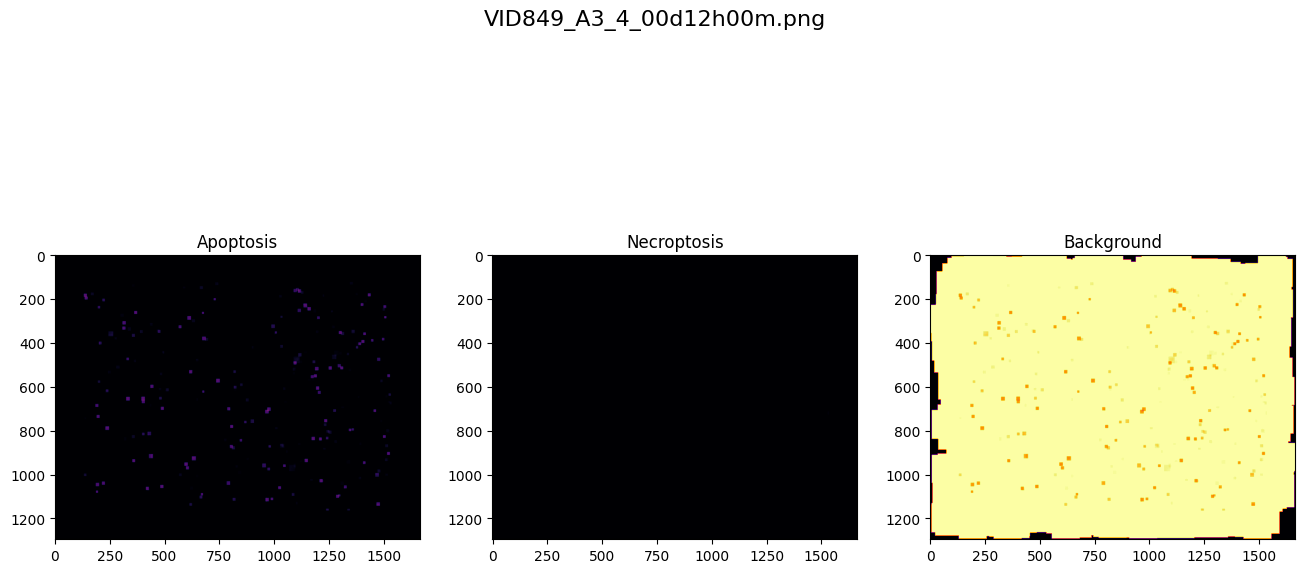

In [7]:
fig, ((ax1),(ax2), (ax3)) = plt.subplots(nrows=1,ncols=3,figsize=(16,8))
fig.suptitle(str(images[image_id]), fontsize=16)

ax1.imshow(apoptosis_image, vmin=0.0, vmax=1.0, cmap='inferno')
ax1.set_title("Apoptosis")

ax2.imshow(necroptosis_image, vmin=0.0, vmax=1.0, cmap='inferno')
ax2.set_title("Necroptosis")

ax3.imshow(background_image, vmin=0.0, vmax=1.0, cmap='inferno')
ax3.set_title("Background")

In [8]:
IF_GREEN = True

if IF_GREEN:
    image_boxed, image_green_boxed = cell_detector.box_image(big_image, results, image_green = img_green, prepare_type = 0)
else:
    image_boxed = cell_detector.box_image(big_image, results)

Text(0.5, 1.0, 'Necroptosis')

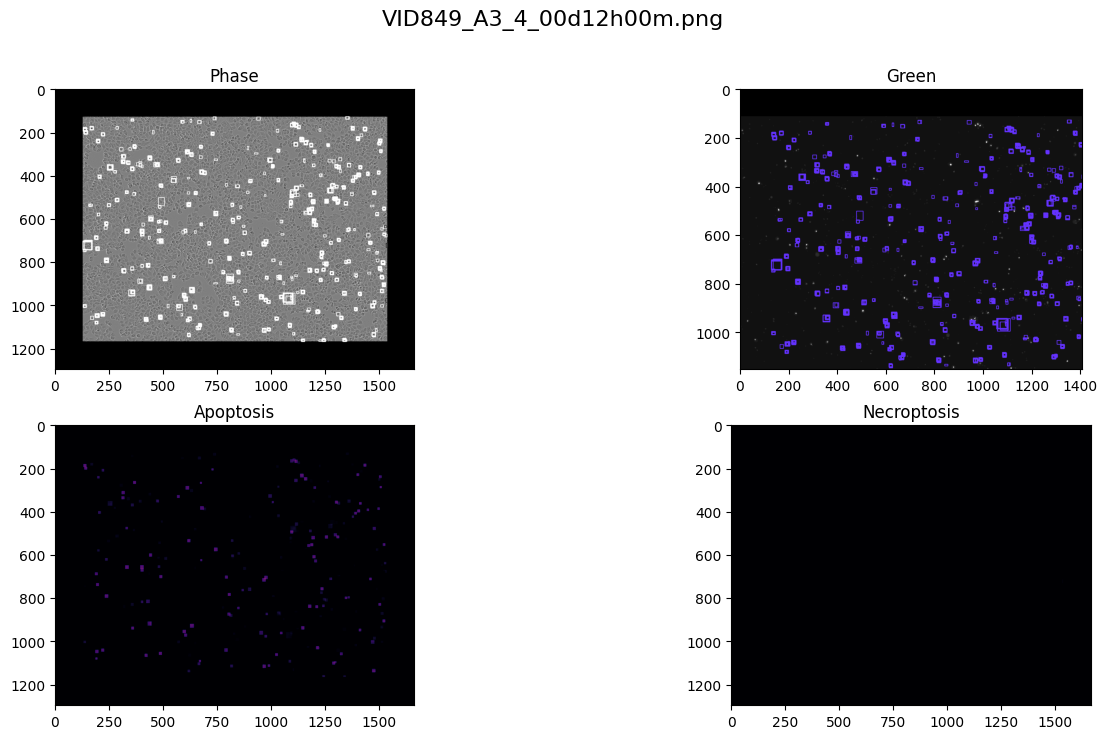

In [9]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(16,8))
fig.suptitle(str(images[image_id]), fontsize=16)

image_boxed = cv2.cvtColor(image_boxed, cv2.COLOR_BGR2RGB)

image_green_boxed = cv2.cvtColor(image_green_boxed, cv2.COLOR_BGR2RGB)


ax1.imshow(image_boxed)
ax1.set_title("Phase")

ax2.imshow(image_green_boxed)
ax2.set_title("Green")

ax3.imshow(apoptosis_image, vmin=0.0, vmax=1.0, cmap='inferno')
ax3.set_title("Apoptosis")

ax4.imshow(necroptosis_image, vmin=0.0, vmax=1.0, cmap='inferno')
ax4.set_title("Necroptosis")

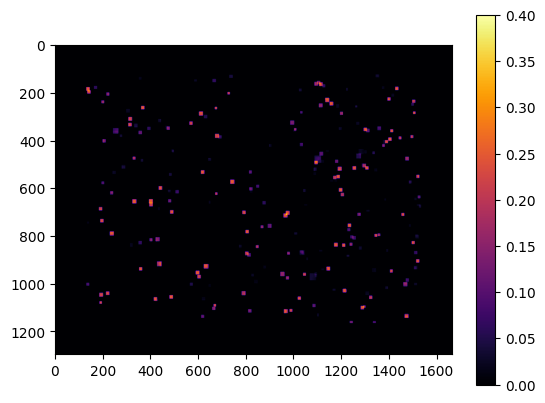

In [14]:
plt.imshow(apoptosis_image, vmin=0.0, vmax=0.4, cmap='inferno')
plt.colorbar()
plt.show()